# Final Project - Data Cleaning and Question Definition
## 90-803 Machine Learning Foundations with Python (Spring 2023)
### Team: Team 6 / M'N'M
### Name: Niharika Patil, Marisa Yang, Madi Zhaksylyk

In [14]:
# import packages, including cpi (need to install before importing)
import pandas as pd
import numpy as np
import cpi
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [52]:
#read values 
values = pd.read_csv('C:/Users/mjaks/data/player_valuations.csv')
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419593 entries, 0 to 419592
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   date                                 419593 non-null  object
 1   datetime                             419593 non-null  object
 2   dateweek                             419593 non-null  object
 3   player_id                            419593 non-null  int64 
 4   current_club_id                      419593 non-null  int64 
 5   market_value_in_eur                  419593 non-null  int64 
 6   player_club_domestic_competition_id  419593 non-null  object
dtypes: int64(3), object(4)
memory usage: 22.4+ MB


In [53]:
comps = pd.read_csv('C:/Users/mjaks/data/competitions.csv')
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   competition_id        43 non-null     object 
 1   competition_code      43 non-null     object 
 2   name                  43 non-null     object 
 3   type                  43 non-null     object 
 4   sub_type              43 non-null     object 
 5   country_id            43 non-null     int64  
 6   country_name          36 non-null     object 
 7   country_latitude      43 non-null     float64
 8   country_longitude     43 non-null     float64
 9   domestic_league_code  36 non-null     object 
 10  confederation         43 non-null     object 
 11  url                   43 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.2+ KB


In [54]:
comps = comps[['competition_id', 'name', 'country_name']]
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   competition_id  43 non-null     object
 1   name            43 non-null     object
 2   country_name    36 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


We are going to use only certain columns from the competitions dataset, we only need competition id, name and country name for merging with clubs.

In [55]:
clubs = pd.read_csv('C:/Users/mjaks/data/clubs.csv')
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  411 non-null    int64  
 1   club_code                411 non-null    object 
 2   name                     411 non-null    object 
 3   domestic_competition_id  411 non-null    object 
 4   total_market_value       125 non-null    float64
 5   squad_size               411 non-null    int64  
 6   average_age              382 non-null    float64
 7   foreigners_number        411 non-null    int64  
 8   foreigners_percentage    370 non-null    float64
 9   national_team_players    411 non-null    int64  
 10  stadium_name             411 non-null    object 
 11  stadium_seats            411 non-null    int64  
 12  net_transfer_record      411 non-null    object 
 13  coach_name               170 non-null    object 
 14  url                      4

In [56]:
clubs = clubs[['club_id', 'domestic_competition_id']]
clubs.rename(columns={'domestic_competition_id': 'competition_id', 'club_id': 'player_club_id'}, inplace=True)
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player_club_id  411 non-null    int64 
 1   competition_id  411 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


For the clubs dataset, we only need club id and competition id for merging with competitions dataset. We also need to change the column names so that they are the same before merging.

In [57]:
comps = pd.merge(clubs, comps, on = 'competition_id')
comps = comps.drop(columns = ['competition_id'])
comps.sample(10)

,player_club_id,name,country_name
309,1095,Ligue 1,France
400,2759,Scottish Premiership,Scotland
139,2696,Premier Liga,Russia
346,2079,Super League 1,Greece
141,142,Laliga,Spain
312,995,Ligue 1,France
69,11688,Super Lig,Turkey
286,83678,Premier Liga,Ukraine
335,678,Superligaen,Denmark
50,19789,Super Lig,Turkey


Now we have competition id and club id in the same dataset, which we can use to merge with appearances dataset in the future. Country names will help us match the league rankings from the official website of UEFA (annual ranking of leagues). *For UEFA country/league rankings, we took data for 2020/2021. The reason for that is Russia's ranking had fallen dramatically after their clubs were banned from European competitions due to the war in Ukraine.*

In [58]:
# read appearances as dataset games. level of granularity at this point: game
games = pd.read_csv('C:/Users/mjaks/data/appearances.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140606 entries, 0 to 1140605
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1140606 non-null  object
 1   game_id                 1140606 non-null  int64 
 2   player_id               1140606 non-null  int64 
 3   player_club_id          1140606 non-null  int64 
 4   player_current_club_id  1140606 non-null  int64 
 5   date                    1128699 non-null  object
 6   player_name             1140377 non-null  object
 7   competition_id          1140606 non-null  object
 8   yellow_cards            1140606 non-null  int64 
 9   red_cards               1140606 non-null  int64 
 10  goals                   1140606 non-null  int64 
 11  assists                 1140606 non-null  int64 
 12  minutes_played          1140606 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 113.1+ MB


In [59]:
# see % of missing values
print(games.isna().sum()/len(games) * 100)
games = games.drop(columns = ['player_name'], axis = 1)
games.info()

appearance_id             0.000000
game_id                   0.000000
player_id                 0.000000
player_club_id            0.000000
player_current_club_id    0.000000
date                      1.043919
player_name               0.020077
competition_id            0.000000
yellow_cards              0.000000
red_cards                 0.000000
goals                     0.000000
assists                   0.000000
minutes_played            0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140606 entries, 0 to 1140605
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1140606 non-null  object
 1   game_id                 1140606 non-null  int64 
 2   player_id               1140606 non-null  int64 
 3   player_club_id          1140606 non-null  int64 
 4   player_current_club_id  1140606 non-null  int64 
 5   date                    1128699 no

Only 'date' and 'player names' have some missing values. For 'player names', we can drop this column, since having it does not affect our prediction, also we have unique 'player id' for grouping, aggreagting and/or merging.

In [60]:
# drop missing values for date
games = games.dropna(subset=['date'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128699 entries, 0 to 1140605
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1128699 non-null  object
 1   game_id                 1128699 non-null  int64 
 2   player_id               1128699 non-null  int64 
 3   player_club_id          1128699 non-null  int64 
 4   player_current_club_id  1128699 non-null  int64 
 5   date                    1128699 non-null  object
 6   competition_id          1128699 non-null  object
 7   yellow_cards            1128699 non-null  int64 
 8   red_cards               1128699 non-null  int64 
 9   goals                   1128699 non-null  int64 
 10  assists                 1128699 non-null  int64 
 11  minutes_played          1128699 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 111.9+ MB


For 'date' column, we'll have to drop the null values (only 1% of the data), because without dates we can not know when a game took place. After dropping missing values for column 'date', we have 1128699 entries, which is still enough for our purposes.

In [61]:
# add 'year' column based on 'date'
games = games.copy()
games.loc[:, 'date'] = pd.to_datetime(games['date'])

games['year'] = games['date'].dt.year.astype(int)

# remove data for games in 2023
games = games[games['year'] < 2023]
# print the dataframe
games.info()
games.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103694 entries, 0 to 1140597
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1103694 non-null  object        
 1   game_id                 1103694 non-null  int64         
 2   player_id               1103694 non-null  int64         
 3   player_club_id          1103694 non-null  int64         
 4   player_current_club_id  1103694 non-null  int64         
 5   date                    1103694 non-null  datetime64[ns]
 6   competition_id          1103694 non-null  object        
 7   yellow_cards            1103694 non-null  int64         
 8   red_cards               1103694 non-null  int64         
 9   goals                   1103694 non-null  int64         
 10  assists                 1103694 non-null  int64         
 11  minutes_played          1103694 non-null  int64         
 12  year          

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year
422342,2978843_272679,2978843,272679,1244,1244,2018-01-10,CDR,0,0,0,1,62,2018
1016676,3597953_555719,3597953,555719,467,467,2022-01-23,NL1,0,0,0,0,68,2022
180986,2579897_106641,2579897,106641,511,511,2015-08-15,SC1,0,0,1,0,79,2015
130181,2517522_140579,2517522,140579,15,1123,2015-03-17,CL,0,0,0,0,69,2015
347363,2700802_79573,2700802,79573,202,202,2017-01-29,NL1,0,0,0,0,90,2017
1090108,3838005_257455,3838005,257455,931,931,2022-09-16,GB1,1,0,1,0,90,2022
505450,2897508_12563,2897508,12563,252,252,2018-04-29,IT1,0,0,0,0,45,2018
956720,3651065_500091,3651065,500091,114,114,2021-09-28,CL,0,0,0,0,90,2021
47082,2505085_88983,2505085,88983,2760,2553,2015-01-17,SC1,0,0,0,0,23,2015
1023097,3621627_742453,3621627,742453,1075,1075,2022-05-08,PO1,0,0,0,1,45,2022


Since the level of analysis in our project is year, we need years for every game. Now we have the years for the games every player participated in a game. Also, we remove the values for games in 2023, since otherwise the data for 2023 would be incomplete. Now our dataset has 1103694 entries.

In [62]:
games['games_played'] = 1

games['CL_minutes_played'] = np.where(games['competition_id'] == 'CL', games['minutes_played'], 0)
games['CL_games_played'] = np.where(games['competition_id'] == 'CL', 1, 0)

games['EL_minutes_played'] = np.where(games['competition_id'] == 'EL', games['minutes_played'], 0)
games['EL_games_played'] = np.where(games['competition_id'] == 'EL', 1, 0)


We also want to consider if a player participated in international level competitions, such as Champions League and Europa League. So, knowing how many games/minutes they played in each of the competitions will be helpful for the model. Usually, if a player participated in international competitions, it increases their market value.

In [63]:
games = pd.merge(games, comps, on = 'player_club_id')
games.sample(10)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,year,games_played,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played,name,country_name
855394,2958620_282927,2958620,282927,29228,3508,2017-12-26,BE1,0,0,0,1,90,2017,1,0,0,0,0,Jupiler Pro League,Belgium
626637,2700909_265625,2700909,265625,1435,276,2017-04-22,NL1,0,0,0,0,5,2017,1,0,0,0,0,Eredivisie,Netherlands
824499,3415438_348791,3415438,348791,1184,1421,2021-01-30,BE1,0,0,0,0,77,2021,1,0,0,0,0,Jupiler Pro League,Belgium
907313,2704251_74295,2704251,74295,60,60,2016-09-23,L1,0,0,0,0,90,2016,1,0,0,0,0,Bundesliga,Germany
505394,2495701_164693,2495701,164693,3426,5724,2014-11-22,DK1,0,0,3,0,90,2014,1,0,0,0,0,Superligaen,Denmark
132704,3400505_382096,3400505,382096,2999,1241,2021-02-07,SC1,0,0,0,0,90,2021,1,0,0,0,0,Scottish Premiership,Scotland
346730,3860283_616894,3860283,616894,449,449,2022-10-22,TR1,1,0,0,0,90,2022,1,0,0,0,0,Super Lig,Turkey
17530,3050184_241641,3050184,241641,281,281,2018-08-19,GB1,0,0,0,0,90,2018,1,0,0,0,0,Premier League,England
375642,3223139_306462,3223139,306462,2381,36,2019-12-15,TR1,1,0,0,1,90,2019,1,0,0,0,0,Super Lig,Turkey
428524,3613063_166086,3613063,166086,2293,2696,2022-02-04,TR1,0,0,0,0,80,2022,1,0,0,0,0,Super Lig,Turkey


We merged the games dataset with comps dataset in order to get the league a player's club is in.

In [64]:
print(games['country_name'].unique())
country_rankings = {
    'England': 1,
    'Spain': 2,
    'Germany': 4,
    'Italy': 3,
    'France': 5,
    'Russia': 8 , 
    'Denmark': 14, 
    'Netherlands': 7,
    'Greece': 20, 
    'Portugal': 6, 
    'Scotland': 11,
    'Turkey': 13, 
    'Ukraine': 12, 
    'Belgium': 9}

['Russia' 'Portugal' 'England' 'Germany' 'Denmark' 'Netherlands' 'Italy'
 'Greece' 'Spain' 'France' 'Scotland' 'Turkey' 'Ukraine' 'Belgium']


Based on UEFA country rankings, we add ranks for every league.

In [65]:
# add new column with league rank
games['league_rank'] = games['country_name'].map(country_rankings)
games.sample(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,competition_id,yellow_cards,red_cards,goals,...,minutes_played,year,games_played,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played,name,country_name,league_rank
740052,2486756_50201,2486756,50201,405,873,2015-03-14,GB1,0,0,2,...,83,2015,1,0,0,0,0,Premier League,England,1
707731,2475389_51474,2475389,51474,621,5358,2015-02-01,ES1,0,0,0,...,90,2015,1,0,0,0,0,Laliga,Spain,2
237949,3302940_182816,3302940,182816,3057,3057,2020-02-22,BE1,0,0,0,...,90,2020,1,0,0,0,0,Jupiler Pro League,Belgium,9
393153,3838267_134270,3838267,134270,762,762,2022-12-31,GB1,0,0,0,...,90,2022,1,0,0,0,0,Premier League,England,1
539586,3222667_311351,3222667,311351,371,371,2019-07-23,CLQ,0,0,0,...,31,2019,1,0,0,0,0,Scottish Premiership,Scotland,11


Now we have a new column in our dataset with league ranks for every game.

In [66]:
values = values[['date', 'player_id', 'market_value_in_eur']]
values.head(10)
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419593 entries, 0 to 419592
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date                 419593 non-null  object
 1   player_id            419593 non-null  int64 
 2   market_value_in_eur  419593 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.6+ MB


From the values dataset, we only need the date the valuation was made on for every player (one player may have multiple valuations), and the market value corresponding to that date.

In [67]:
values['date']= pd.to_datetime(values['date'])
values = values[values['date'] < '2023-01-01']

To keep this dataset consistent with the games dataset, we are filtering the data for entries before 2023.

In [68]:
values['val_year'] = values['date'].dt.year.astype(int)

In [69]:
values['adjusted_price'] = values.apply(lambda values: cpi.inflate(values['market_value_in_eur'], values['val_year'], to=2022), axis=1)

We also want to make market values comparable over years, we take into account the inflation rate up to and including 2022, so everything is in 2022 prices.

In [70]:
values.sample(10)

,date,player_id,market_value_in_eur,val_year,adjusted_price
25321,2018-02-01,240077,75000,2018,8.740945e+04
286628,2019-12-05,504882,1000000,2019,1.144717e+06
353670,2021-06-04,574385,4000000,2021,4.320109e+06
78744,2011-08-22,23918,1250000,2011,1.626302e+06
306296,2021-05-21,224256,500000,2021,5.400137e+05
241908,2015-03-29,39102,5000000,2015,6.173713e+06
277976,2016-07-13,170767,2000000,2016,2.438721e+06
93105,2022-09-30,265573,350000,2022,3.500000e+05
191629,2008-03-18,70869,200000,2008,2.718541e+05
237,2019-12-28,67369,750000,2019,8.585380e+05


In [71]:
games = games.sort_values('date')
values = values.sort_values('date')

#match every player-game with the nearest-date valuation 
games = pd.merge_asof(games, values, on='date', by=['player_id'], direction='nearest')
games.sample(20)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,competition_id,yellow_cards,red_cards,goals,...,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played,name,country_name,league_rank,market_value_in_eur,val_year,adjusted_price
101223,2532470_237436,2532470,237436,173,206,2015-03-15,DK1,1,0,0,...,0,0,0,0,Superligaen,Denmark,14,50000.0,2015.0,6.173713e+04
87371,2498712_234787,2498712,234787,982,982,2015-02-16,PO1,0,0,1,...,0,0,0,0,Liga Portugal Bwin,Portugal,6,700000.0,2015.0,8.643199e+05
670064,3210343_160929,3210343,160929,206,3,2019-09-22,DK1,0,0,0,...,0,0,0,0,Superligaen,Denmark,14,800000.0,2019.0,9.157739e+05
390805,2698396_174915,2698396,174915,1003,58,2017-05-18,GB1,0,0,0,...,0,0,0,0,Premier League,England,1,25000000.0,2017.0,2.984814e+07
931882,3605295_72522,3605295,72522,131,383,2021-10-02,ES1,0,0,0,...,0,0,0,0,Laliga,Spain,2,7500000.0,2021.0,8.100205e+06
56881,2469546_140032,2469546,140032,294,2425,2014-12-06,PO1,0,0,0,...,0,0,0,0,Liga Portugal Bwin,Portugal,6,7000000.0,2014.0,8.653458e+06
672823,3203479_38410,3203479,38410,33,167,2019-09-28,L1,1,0,0,...,0,0,0,0,Bundesliga,Germany,4,5000000.0,2019.0,5.723587e+06
1048669,3888995_520815,3888995,520815,683,683,2022-08-29,GR1,0,0,0,...,0,0,0,0,Super League 1,Greece,20,4000000.0,2022.0,4.000000e+06
225058,2645811_147846,2645811,147846,383,499,2016-02-24,CL,0,0,0,...,25,1,0,0,Eredivisie,Netherlands,7,3000000.0,2016.0,3.658081e+06
331292,2698218_134425,2698218,134425,281,631,2016-12-26,GB1,0,0,0,...,0,0,0,0,Premier League,England,1,45000000.0,2017.0,5.372664e+07


We want to match the valuation dates with every game, so that we have the latest valuation for a player-game-club-year combination.

In [72]:
games = games.dropna(subset=['appearance_id'])

Since some players with valuations do not have game records, we need to drop entries without game record. 

In [73]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1098026 entries, 0 to 1098025
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   appearance_id           1098026 non-null  object        
 1   game_id                 1098026 non-null  int64         
 2   player_id               1098026 non-null  int64         
 3   player_club_id          1098026 non-null  int64         
 4   player_current_club_id  1098026 non-null  int64         
 5   date                    1098026 non-null  datetime64[ns]
 6   competition_id          1098026 non-null  object        
 7   yellow_cards            1098026 non-null  int64         
 8   red_cards               1098026 non-null  int64         
 9   goals                   1098026 non-null  int64         
 10  assists                 1098026 non-null  int64         
 11  minutes_played          1098026 non-null  int64         
 12  year          

In [74]:
# group the data by player&club&year
player_year = games.groupby(['player_id', 'player_club_id', 'year'])

# aggregate player stats
games_agg = player_year.agg({'goals': 'sum',
                          'assists': 'sum',
                          'yellow_cards': 'sum',
                          'red_cards': 'sum',
                          'minutes_played': 'sum',
                             'games_played': 'sum',
                             'league_rank': 'mean',
                             'adjusted_price': 'mean',
                          'CL_minutes_played': 'sum',
                             'CL_games_played': 'sum',
                          'EL_minutes_played': 'sum',
                            'EL_games_played': 'sum'}).reset_index()

games_agg.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75775 entries, 0 to 75774
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          75775 non-null  int64  
 1   player_club_id     75775 non-null  int64  
 2   year               75775 non-null  int64  
 3   goals              75775 non-null  int64  
 4   assists            75775 non-null  int64  
 5   yellow_cards       75775 non-null  int64  
 6   red_cards          75775 non-null  int64  
 7   minutes_played     75775 non-null  int64  
 8   games_played       75775 non-null  int64  
 9   league_rank        75775 non-null  float64
 10  adjusted_price     75608 non-null  float64
 11  CL_minutes_played  75775 non-null  int64  
 12  CL_games_played    75775 non-null  int32  
 13  EL_minutes_played  75775 non-null  int64  
 14  EL_games_played    75775 non-null  int32  
dtypes: float64(2), int32(2), int64(11)
memory usage: 8.1 MB


,player_id,player_club_id,year,goals,assists,yellow_cards,red_cards,minutes_played,games_played,league_rank,adjusted_price,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played
24138,90660,993,2015,0,1,4,0,526,14,2.0,2.866367e+06,0,0,0,0
27497,108725,1132,2021,12,3,1,0,2830,35,1.0,7.899628e+06,0,0,0,0
61225,344695,27,2022,0,2,4,0,3047,39,4.0,4.740521e+07,565,9,0,0
41667,190685,244,2020,0,2,1,0,782,10,5.0,8.638471e+06,0,0,0,0
59306,331560,1025,2019,0,1,4,0,1164,13,3.0,1.118301e+07,0,0,0,0
33042,137576,2282,2015,2,5,4,0,1710,26,9.0,6.167797e+06,0,0,190,4
18375,65256,798,2016,1,2,6,0,1302,17,7.0,7.244346e+05,0,0,0,0
46589,225119,3325,2019,0,2,1,0,501,7,6.0,5.151228e+05,0,0,0,0
22099,81433,2944,2017,0,0,3,0,293,11,13.0,2.550659e+06,0,0,9,1
25164,94783,289,2015,0,0,2,0,1303,17,1.0,2.505801e+06,0,0,0,0


In [75]:
games_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75775 entries, 0 to 75774
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          75775 non-null  int64  
 1   player_club_id     75775 non-null  int64  
 2   year               75775 non-null  int64  
 3   goals              75775 non-null  int64  
 4   assists            75775 non-null  int64  
 5   yellow_cards       75775 non-null  int64  
 6   red_cards          75775 non-null  int64  
 7   minutes_played     75775 non-null  int64  
 8   games_played       75775 non-null  int64  
 9   league_rank        75775 non-null  float64
 10  adjusted_price     75608 non-null  float64
 11  CL_minutes_played  75775 non-null  int64  
 12  CL_games_played    75775 non-null  int32  
 13  EL_minutes_played  75775 non-null  int64  
 14  EL_games_played    75775 non-null  int32  
dtypes: float64(2), int32(2), int64(11)
memory usage: 8.1 MB


Now we have player stats aggregated by player ID, player club and year, which should be the level of analysis.
Simply speaking, we have statistics for yearly player performance, and if a player changed their club during the year, performance for both/all clubs is captured.

After grouping, our dataset consists of 75775 entries.

In [76]:
# introduce new performance metrics 
games_agg['goals_per_90'] = games_agg['goals'] / (games_agg['minutes_played'] / 90) # how many goals every 90 minute?
games_agg['assists_per_90'] = games_agg['assists'] / (games_agg['minutes_played'] / 90) # how many assists every 90 minute?
games_agg['yellows_per_90'] = games_agg['yellow_cards'] / (games_agg['minutes_played'] / 90) # how many yellow cards every 90 minute?
games_agg['reds_per_90'] = games_agg['red_cards'] / (games_agg['minutes_played'] / 90) # how many red cards every 90 minute?
games_agg['minutes_per_game'] = games_agg['minutes_played'] / games_agg['games_played'] # average number of minutes per game

games_agg.head()

,player_id,player_club_id,year,goals,assists,yellow_cards,red_cards,minutes_played,games_played,league_rank,adjusted_price,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played,goals_per_90,assists_per_90,yellows_per_90,reds_per_90,minutes_per_game
0,10,398,2014,4,3,2,0,496,15,3.0,1.235231e+06,0,0,0,0,0.725806,0.544355,0.362903,0.0,33.066667
1,10,398,2015,12,8,6,0,2429,36,3.0,1.230897e+06,0,0,66,1,0.444627,0.296418,0.222314,0.0,67.472222
2,10,398,2016,8,5,1,0,1078,20,3.0,1.219360e+06,0,0,99,3,0.667904,0.417440,0.083488,0.0,53.900000
3,26,16,2014,0,0,0,0,1530,17,4.0,5.161177e+06,450,5,0,0,0.000000,0.000000,0.000000,0.0,90.000000
4,26,16,2015,0,0,0,0,2160,24,4.0,2.829619e+06,180,2,540,6,0.000000,0.000000,0.000000,0.0,90.000000


Since our dataset contains raw numbers of goals, assists, cards and minutes, we want to standardize these metrics across columns to give us ratios. Instead of just raw number of goals and assists, we want to factor goal and assists per 90 minutes, and so on.

Also, due to some reasons (injury, conflict with the management, legal issues, personal and other reasons) a player may take part in only a few games for their club during season, which is not representative of his overall performance for the club. For ex., what if a player X started the season Y with club Z, played one game (90 minutes) and scored 2 goals, but got injured at the end of that game and missed the whole season. This player's 'goals per 90' will be unreasonably very high and affect the prediction. For representativeness, quality and reliability of the analysis we don't want to take into account player-club-year combinations when a player participated in a very few games/minutes. 
At the same time, we acknowledge that playing few minutes could also be a good indicator of the value of a player. So, we set the threshold for the number of minutes played at 450 minutes (generally accepted minimum). 

In [77]:
games_agg = games_agg[games_agg['minutes_played'] > 450]
games_agg.sample(10)
games_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49602 entries, 0 to 75765
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_id          49602 non-null  int64  
 1   player_club_id     49602 non-null  int64  
 2   year               49602 non-null  int64  
 3   goals              49602 non-null  int64  
 4   assists            49602 non-null  int64  
 5   yellow_cards       49602 non-null  int64  
 6   red_cards          49602 non-null  int64  
 7   minutes_played     49602 non-null  int64  
 8   games_played       49602 non-null  int64  
 9   league_rank        49602 non-null  float64
 10  adjusted_price     49593 non-null  float64
 11  CL_minutes_played  49602 non-null  int64  
 12  CL_games_played    49602 non-null  int32  
 13  EL_minutes_played  49602 non-null  int64  
 14  EL_games_played    49602 non-null  int32  
 15  goals_per_90       49602 non-null  float64
 16  assists_per_90     496

In [78]:
games_agg.columns

Index(['player_id', 'player_club_id', 'year', 'goals', 'assists',
       'yellow_cards', 'red_cards', 'minutes_played', 'games_played',
       'league_rank', 'adjusted_price', 'CL_minutes_played', 'CL_games_played',
       'EL_minutes_played', 'EL_games_played', 'goals_per_90',
       'assists_per_90', 'yellows_per_90', 'reds_per_90', 'minutes_per_game'],
      dtype='object')

In [79]:
#Read Dataset
df = pd.read_csv('C:/Users/mjaks/data/players.csv')
df.head()

,player_id,name,current_club_id,current_club_name,country_of_citizenship,country_of_birth,city_of_birth,date_of_birth,position,sub_position,...,highest_market_value_in_eur,agent_name,contract_expiration_date,current_club_domestic_competition_id,first_name,last_name,player_code,image_url,last_season,url
0,134354,Ian Raeymaekers,498,Ksc Lokeren,Belgium,Belgium,Aalst,1995-01-30,Attack,Centre-Forward,...,50000.0,NaN,NaN,BE1,Ian,Raeymaekers,ian-raeymaekers,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/ian-raeymaeker...
1,99946,Mohamed Camara,1095,Es Troyes Ac,Guinea,Guinea,Conakry,1990-09-20,Attack,Centre-Forward,...,300000.0,NaN,NaN,FR1,Mohamed,Camara,mohamed-camara,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/mohamed-camara...
2,76948,Pablo Olivera,979,Moreirense Fc,Uruguay,Uruguay,Melo,1987-12-08,Attack,Centre-Forward,...,600000.0,NaN,NaN,PO1,Pablo,Olivera,pablo-olivera,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/pablo-olivera/...
3,108372,Aliosman Aydin,38,Fortuna Dusseldorf,Turkey,Germany,Dormagen,1992-02-06,Attack,Centre-Forward,...,125000.0,NaN,NaN,L1,Aliosman,Aydin,aliosman-aydin,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/aliosman-aydin...
4,78820,Jaime Alfonso Ruiz,354,Kv Mechelen,Colombia,Colombia,Cali,1984-01-03,Attack,Centre-Forward,...,1700000.0,NaN,NaN,BE1,Jaime Alfonso,Ruiz,jaime-alfonso-ruiz,https://img.a.transfermarkt.technology/portrai...,2012,https://www.transfermarkt.co.uk/jaime-alfonso-...


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             28463 non-null  int64  
 1   name                                  28463 non-null  object 
 2   current_club_id                       28463 non-null  int64  
 3   current_club_name                     28463 non-null  object 
 4   country_of_citizenship                28462 non-null  object 
 5   country_of_birth                      26587 non-null  object 
 6   city_of_birth                         26599 non-null  object 
 7   date_of_birth                         28428 non-null  object 
 8   position                              28463 non-null  object 
 9   sub_position                          25025 non-null  object 
 10  foot                                  26278 non-null  object 
 11  height_in_cm   

In [81]:
#Calculating the nulls and NAs of each column in the dataset
df.isnull().sum()

player_id                                   0
name                                        0
current_club_id                             0
current_club_name                           0
country_of_citizenship                      1
country_of_birth                         1876
city_of_birth                            1864
date_of_birth                              35
position                                    0
sub_position                             3438
foot                                     2185
height_in_cm                                0
market_value_in_eur                      8958
highest_market_value_in_eur              1082
agent_name                              11019
contract_expiration_date                11272
current_club_domestic_competition_id        0
first_name                               1779
last_name                                   0
player_code                                 0
image_url                                   0
last_season                       

In [82]:
#drop columns not going to be used in the prediction model
columns = ['url', 'last_season', 'image_url', 'player_code', 'last_name', 'first_name', 'city_of_birth', 'name', 'current_club_name', 'agent_name', 'current_club_domestic_competition_id']
players_df = df.drop(columns, axis = 1)
players_df

,player_id,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,134354,498,Belgium,Belgium,1995-01-30,Attack,Centre-Forward,Right,0,NaN,50000.0,NaN
1,99946,1095,Guinea,Guinea,1990-09-20,Attack,Centre-Forward,Right,180,NaN,300000.0,NaN
2,76948,979,Uruguay,Uruguay,1987-12-08,Attack,Centre-Forward,Right,175,25000.0,600000.0,NaN
3,108372,38,Turkey,Germany,1992-02-06,Attack,Centre-Forward,Right,178,NaN,125000.0,NaN
4,78820,354,Colombia,Colombia,1984-01-03,Attack,Centre-Forward,Right,184,NaN,1700000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
28458,520073,232,Russia,Russia,2001-08-18,Defender,Centre-Back,Right,184,2800000.0,2800000.0,2026-06-30
28459,238752,232,Senegal,Spain,1995-03-08,Attack,Centre-Forward,Both,178,2000000.0,30000000.0,2025-06-30
28460,464259,232,Russia,Russia,1997-03-07,Attack,Centre-Forward,Right,195,9000000.0,11000000.0,2026-06-30
28461,185024,232,Russia,Russia,1993-11-21,Defender,Centre-Back,Left,188,8000000.0,10000000.0,2024-05-31


In [83]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28463 entries, 0 to 28462
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    28463 non-null  int64  
 1   current_club_id              28463 non-null  int64  
 2   country_of_citizenship       28462 non-null  object 
 3   country_of_birth             26587 non-null  object 
 4   date_of_birth                28428 non-null  object 
 5   position                     28463 non-null  object 
 6   sub_position                 25025 non-null  object 
 7   foot                         26278 non-null  object 
 8   height_in_cm                 28463 non-null  int64  
 9   market_value_in_eur          19505 non-null  float64
 10  highest_market_value_in_eur  27381 non-null  float64
 11  contract_expiration_date     17191 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.6+ MB


In [84]:
#Convert position,country_of_birth, country_of_citizenship and foot to categorical values
players_df['position'] = players_df.position.astype('category')
players_df['sub_position'] = players_df.sub_position.astype('category')
players_df['country_of_citizenship'] = players_df.country_of_citizenship.astype('category')
players_df['country_of_birth'] = players_df.country_of_birth.astype('category')
players_df['foot'] = players_df.foot.astype('category')

#Convert date_of_birth to date datatype
players_df['date_of_birth'] = pd.to_datetime(players_df['date_of_birth'])

In [85]:
#Calculating the nulls and NAs after dropping columns not used in our models
players_df.isnull().sum()

player_id                          0
current_club_id                    0
country_of_citizenship             1
country_of_birth                1876
date_of_birth                     35
position                           0
sub_position                    3438
foot                            2185
height_in_cm                       0
market_value_in_eur             8958
highest_market_value_in_eur     1082
contract_expiration_date       11272
dtype: int64

In [86]:
#Dropping columns with a high number of missing values
columns = ['contract_expiration_date', 'market_value_in_eur', 'highest_market_value_in_eur', 'current_club_id','sub_position']
players_df.drop(columns, axis = 1, inplace = True)
players_df

,player_id,country_of_citizenship,country_of_birth,date_of_birth,position,foot,height_in_cm
0,134354,Belgium,Belgium,1995-01-30,Attack,Right,0
1,99946,Guinea,Guinea,1990-09-20,Attack,Right,180
2,76948,Uruguay,Uruguay,1987-12-08,Attack,Right,175
3,108372,Turkey,Germany,1992-02-06,Attack,Right,178
4,78820,Colombia,Colombia,1984-01-03,Attack,Right,184
...,...,...,...,...,...,...,...
28458,520073,Russia,Russia,2001-08-18,Defender,Right,184
28459,238752,Senegal,Spain,1995-03-08,Attack,Both,178
28460,464259,Russia,Russia,1997-03-07,Attack,Right,195
28461,185024,Russia,Russia,1993-11-21,Defender,Left,188


In [88]:
#Percentage of missing values
(players_df.isnull().sum()/len(players_df) * 100).round(2)

player_id                 0.00
country_of_citizenship    0.00
country_of_birth          6.59
date_of_birth             0.12
position                  0.00
foot                      7.68
height_in_cm              0.00
dtype: float64

Since the share of missing values in date_of_birth, country_of_birth and foot columns is low, the rows with missing values can be dropped.

In [100]:
players_df = players_df[players_df['date_of_birth'].notna()]

In [90]:
players_df = players_df[players_df['country_of_birth'].notna()]

In [91]:
players_df = players_df[players_df['foot'].notna()]

(players_df.isnull().sum()/len(players_df) * 100).round(2)

player_id                 0.00
country_of_citizenship    0.00
country_of_birth          0.00
date_of_birth             0.08
position                  0.00
foot                      0.00
height_in_cm              0.00
dtype: float64

There are some rows where Height values are 0 in the dataset. This can be handled by taking the height average 
of players with the same position, footing and country of birth.

In [101]:
players_df['height_in_cm'] = players_df.groupby(['position', 'country_of_birth', 'foot'])['height_in_cm']\
                    .transform(lambda x: x.replace(0, x.mean()))
players_df

,player_id,country_of_citizenship,country_of_birth,date_of_birth,position,foot,height_in_cm
0,134354,Belgium,Belgium,1995-01-30,Attack,Right,170.341615
1,99946,Guinea,Guinea,1990-09-20,Attack,Right,180.000000
2,76948,Uruguay,Uruguay,1987-12-08,Attack,Right,175.000000
3,108372,Turkey,Germany,1992-02-06,Attack,Right,178.000000
4,78820,Colombia,Colombia,1984-01-03,Attack,Right,184.000000
...,...,...,...,...,...,...,...
28458,520073,Russia,Russia,2001-08-18,Defender,Right,184.000000
28459,238752,Senegal,Spain,1995-03-08,Attack,Both,178.000000
28460,464259,Russia,Russia,1997-03-07,Attack,Right,195.000000
28461,185024,Russia,Russia,1993-11-21,Defender,Left,188.000000


In [102]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25040 entries, 0 to 28462
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   player_id               25040 non-null  int64         
 1   country_of_citizenship  25040 non-null  category      
 2   country_of_birth        25040 non-null  category      
 3   date_of_birth           25040 non-null  datetime64[ns]
 4   position                25040 non-null  category      
 5   foot                    25040 non-null  category      
 6   height_in_cm            25040 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(1)
memory usage: 940.5 KB


In [103]:
merged = pd.merge(games_agg, players_df, on = 'player_id')
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48447 entries, 0 to 48446
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   player_id               48447 non-null  int64         
 1   player_club_id          48447 non-null  int64         
 2   year                    48447 non-null  int64         
 3   goals                   48447 non-null  int64         
 4   assists                 48447 non-null  int64         
 5   yellow_cards            48447 non-null  int64         
 6   red_cards               48447 non-null  int64         
 7   minutes_played          48447 non-null  int64         
 8   games_played            48447 non-null  int64         
 9   league_rank             48447 non-null  float64       
 10  adjusted_price          48447 non-null  float64       
 11  CL_minutes_played       48447 non-null  int64         
 12  CL_games_played         48447 non-null  int32 

In [104]:
merged = merged[merged['position'] != 'Goalkeeper']
merged['position'] = merged['position'].cat.remove_categories('Goalkeeper')
merged['position'].unique()

['Attack', 'Midfield', 'Defender']
Categories (3, object): ['Attack', 'Defender', 'Midfield']

We decided no to use goalkeepers in our prediction since there is no performance metrics for goalkeepers.

In [105]:
merged['date_of_birth'] = merged['date_of_birth'].dt.year.astype(int)
merged['age'] = merged['year'] - merged['date_of_birth']
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44742 entries, 0 to 48446
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   player_id               44742 non-null  int64   
 1   player_club_id          44742 non-null  int64   
 2   year                    44742 non-null  int64   
 3   goals                   44742 non-null  int64   
 4   assists                 44742 non-null  int64   
 5   yellow_cards            44742 non-null  int64   
 6   red_cards               44742 non-null  int64   
 7   minutes_played          44742 non-null  int64   
 8   games_played            44742 non-null  int64   
 9   league_rank             44742 non-null  float64 
 10  adjusted_price          44742 non-null  float64 
 11  CL_minutes_played       44742 non-null  int64   
 12  CL_games_played         44742 non-null  int32   
 13  EL_minutes_played       44742 non-null  int64   
 14  EL_games_played       

In our prediction model, we would also like to capture the age of the player, since it affects their market value.

In [106]:
merged.sample(10)

,player_id,player_club_id,year,goals,assists,yellow_cards,red_cards,minutes_played,games_played,league_rank,...,yellows_per_90,reds_per_90,minutes_per_game,country_of_citizenship,country_of_birth,date_of_birth,position,foot,height_in_cm,age
23290,130365,583,2021,0,1,0,0,1135,15,5.0,...,0.000000,0.000000,75.666667,Italy,Italy,1991,Defender,Right,173.0,30
26277,159622,3057,2015,1,3,9,0,2636,30,9.0,...,0.307284,0.000000,87.866667,France,France,1991,Midfield,Left,174.0,24
4366,29622,114,2015,0,0,3,1,1110,13,13.0,...,0.243243,0.081081,85.384615,Austria,Austria,1988,Midfield,Both,178.0,27
8088,45272,2553,2021,0,1,1,0,645,10,11.0,...,0.139535,0.000000,64.500000,DR Congo,Zaire,1987,Midfield,Right,177.0,34
23984,136180,1090,2020,1,6,4,0,2608,30,7.0,...,0.138037,0.000000,86.933333,Norway,Norway,1993,Midfield,Right,176.0,27
39489,301236,252,2020,3,1,6,1,930,17,3.0,...,0.580645,0.096774,54.705882,Italy,Italy,1997,Midfield,Right,183.0,23
41400,339943,520,2021,6,1,3,0,1340,16,9.0,...,0.201493,0.000000,83.750000,Canada,England,1998,Attack,Right,184.0,23
36167,257324,5724,2014,2,0,0,0,600,8,14.0,...,0.000000,0.000000,75.000000,Denmark,Denmark,1993,Defender,Right,185.0,21
996,8060,449,2014,5,1,5,0,1912,22,13.0,...,0.235356,0.000000,86.909091,Algeria,France,1985,Midfield,Right,184.0,29
25254,148368,82,2017,4,1,3,0,1178,17,4.0,...,0.229202,0.000000,69.294118,Belgium,Belgium,1995,Attack,Right,189.0,22


In [107]:
merged = merged.drop(columns = ['date_of_birth'], axis = 1)

In [108]:
merged.sample(10)

,player_id,player_club_id,year,goals,assists,yellow_cards,red_cards,minutes_played,games_played,league_rank,...,assists_per_90,yellows_per_90,reds_per_90,minutes_per_game,country_of_citizenship,country_of_birth,position,foot,height_in_cm,age
34585,238639,1110,2018,5,4,0,1,2345,33,1.0,...,0.153518,0.000000,0.03838,71.060606,Benin,Benin,Attack,Right,190.0,24
30577,193994,2457,2022,2,2,4,0,1064,13,6.0,...,0.169173,0.338346,0.00000,81.846154,Senegal,Senegal,Attack,Right,177.0,30
47122,537854,6993,2020,3,0,2,0,913,13,12.0,...,0.000000,0.197152,0.00000,70.230769,Ukraine,Ukraine,Attack,Left,182.0,20
17318,88016,190,2015,2,1,1,0,1180,17,14.0,...,0.076271,0.076271,0.00000,69.411765,Iceland,Iceland,Attack,Right,186.0,24
8416,45812,2783,2015,4,0,0,0,630,8,12.0,...,0.000000,0.000000,0.00000,78.750000,Serbia,Jugoslawien (SFR),Midfield,Both,181.0,32
46433,490307,1237,2022,1,3,1,0,476,9,1.0,...,0.567227,0.189076,0.00000,52.888889,Zambia,Zambia,Midfield,Right,184.0,24
39206,295183,3057,2018,3,10,6,0,3039,38,9.0,...,0.296150,0.177690,0.00000,79.973684,Romania,Romania,Midfield,Right,178.0,22
47211,543529,683,2021,5,4,3,0,1886,25,20.0,...,0.190880,0.143160,0.00000,75.440000,Guinea,Guinea,Attack,Right,170.0,20
36015,255901,13,2021,1,2,3,0,1418,23,2.0,...,0.126939,0.190409,0.00000,61.652174,Argentina,Argentina,Midfield,Right,180.0,27
42223,352559,2995,2017,2,3,4,0,868,20,6.0,...,0.311060,0.414747,0.00000,43.400000,Portugal,Portugal,Attack,Both,174.0,22


In [109]:
merged.to_csv('C:/Users/mjaks/data/all_merged.csv', index=False)

In [110]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44742 entries, 0 to 48446
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   player_id               44742 non-null  int64   
 1   player_club_id          44742 non-null  int64   
 2   year                    44742 non-null  int64   
 3   goals                   44742 non-null  int64   
 4   assists                 44742 non-null  int64   
 5   yellow_cards            44742 non-null  int64   
 6   red_cards               44742 non-null  int64   
 7   minutes_played          44742 non-null  int64   
 8   games_played            44742 non-null  int64   
 9   league_rank             44742 non-null  float64 
 10  adjusted_price          44742 non-null  float64 
 11  CL_minutes_played       44742 non-null  int64   
 12  CL_games_played         44742 non-null  int32   
 13  EL_minutes_played       44742 non-null  int64   
 14  EL_games_played       

### Visualizations

In [111]:
merged.columns
merged_1 = merged[['minutes_played', 'games_played', 'league_rank', 'adjusted_price', 'CL_minutes_played',
       'CL_games_played', 'EL_minutes_played', 'EL_games_played',
       'goals_per_90', 'assists_per_90', 'yellows_per_90', 'reds_per_90',
       'minutes_per_game', 'height_in_cm', 'age']]


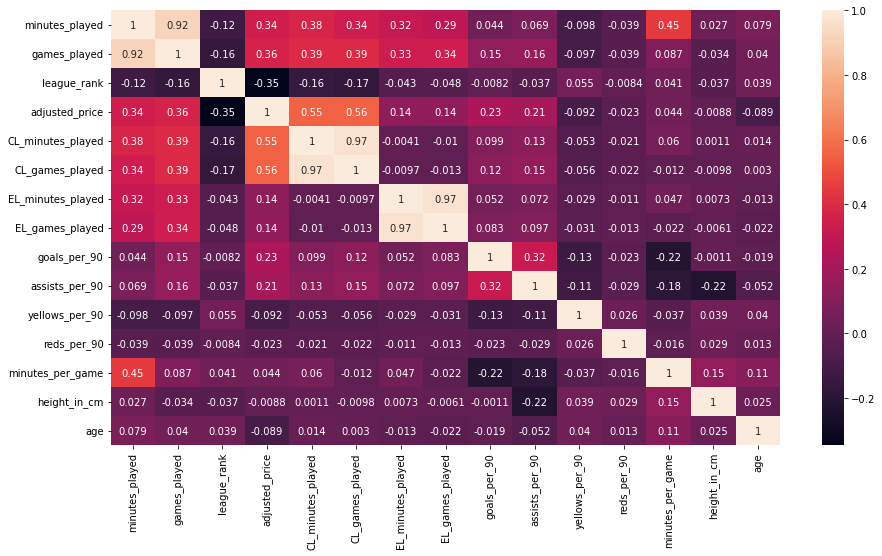

In [112]:
fig, ax1 = plt.subplots(figsize=(15,8))
sns.heatmap(merged_1.corr(method='pearson'), annot = True);

This correlation heatmap illustrates relationships between the variables. Some of the variables with decent correlation with adjusted market value are: games and minutes in the Champions League (0.56 and 0.55), games and minutes in the domestic competition (0.36 and 0.34), and goals and assists per 90 minutes (0.23 and 0.21). Also, as expected, the league rank is negatively correlated with the price, since more competitive leagues have numerically lower ranks (1 - the best league, 2 - second best and so on) and tend to have more valuable players.

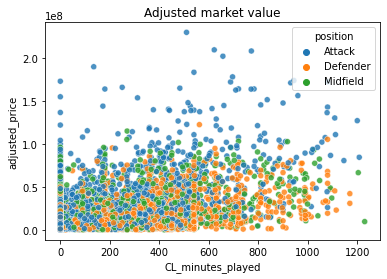

In [113]:
sns.scatterplot(data=merged, x="CL_minutes_played", y="adjusted_price", alpha=0.8, legend=True, hue = 'position', sizes=(100,10000))
plt.title("Adjusted market value")
plt.show()

This scatterplot demonstrates the relationship between the minutes played in the Champions League and the price for different position categories. Attacking players tend to be valued higher. 

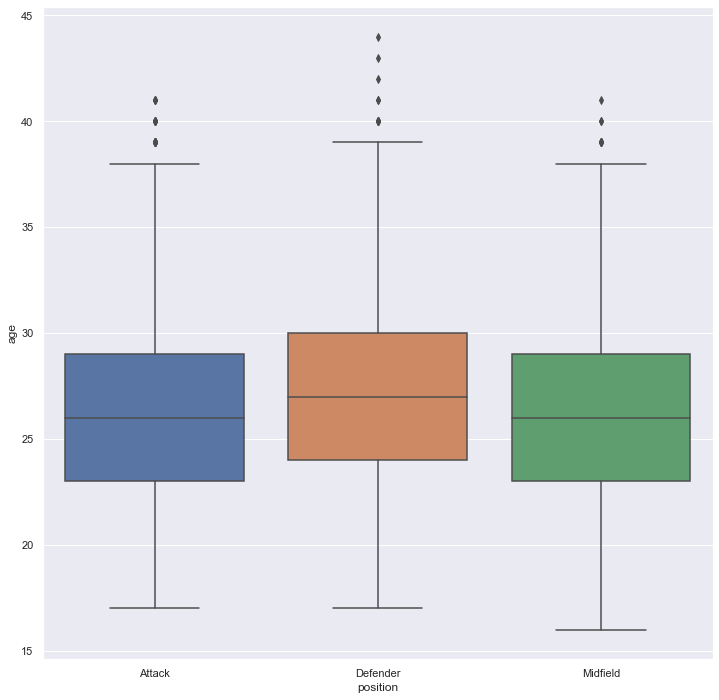

In [114]:
sns.set(rc={'figure.figsize':(12,12)})
ax = sns.boxplot(x="position", y="age", data=merged)

We also looked at age differences between positions using boxplots. As illustrated, midfielders and attackers are usually younger than defenders, probably because their positions require more running and fitness, while for defenders experience may be more important.

In [115]:
merged_2018 = merged[merged['year'] == 2018]

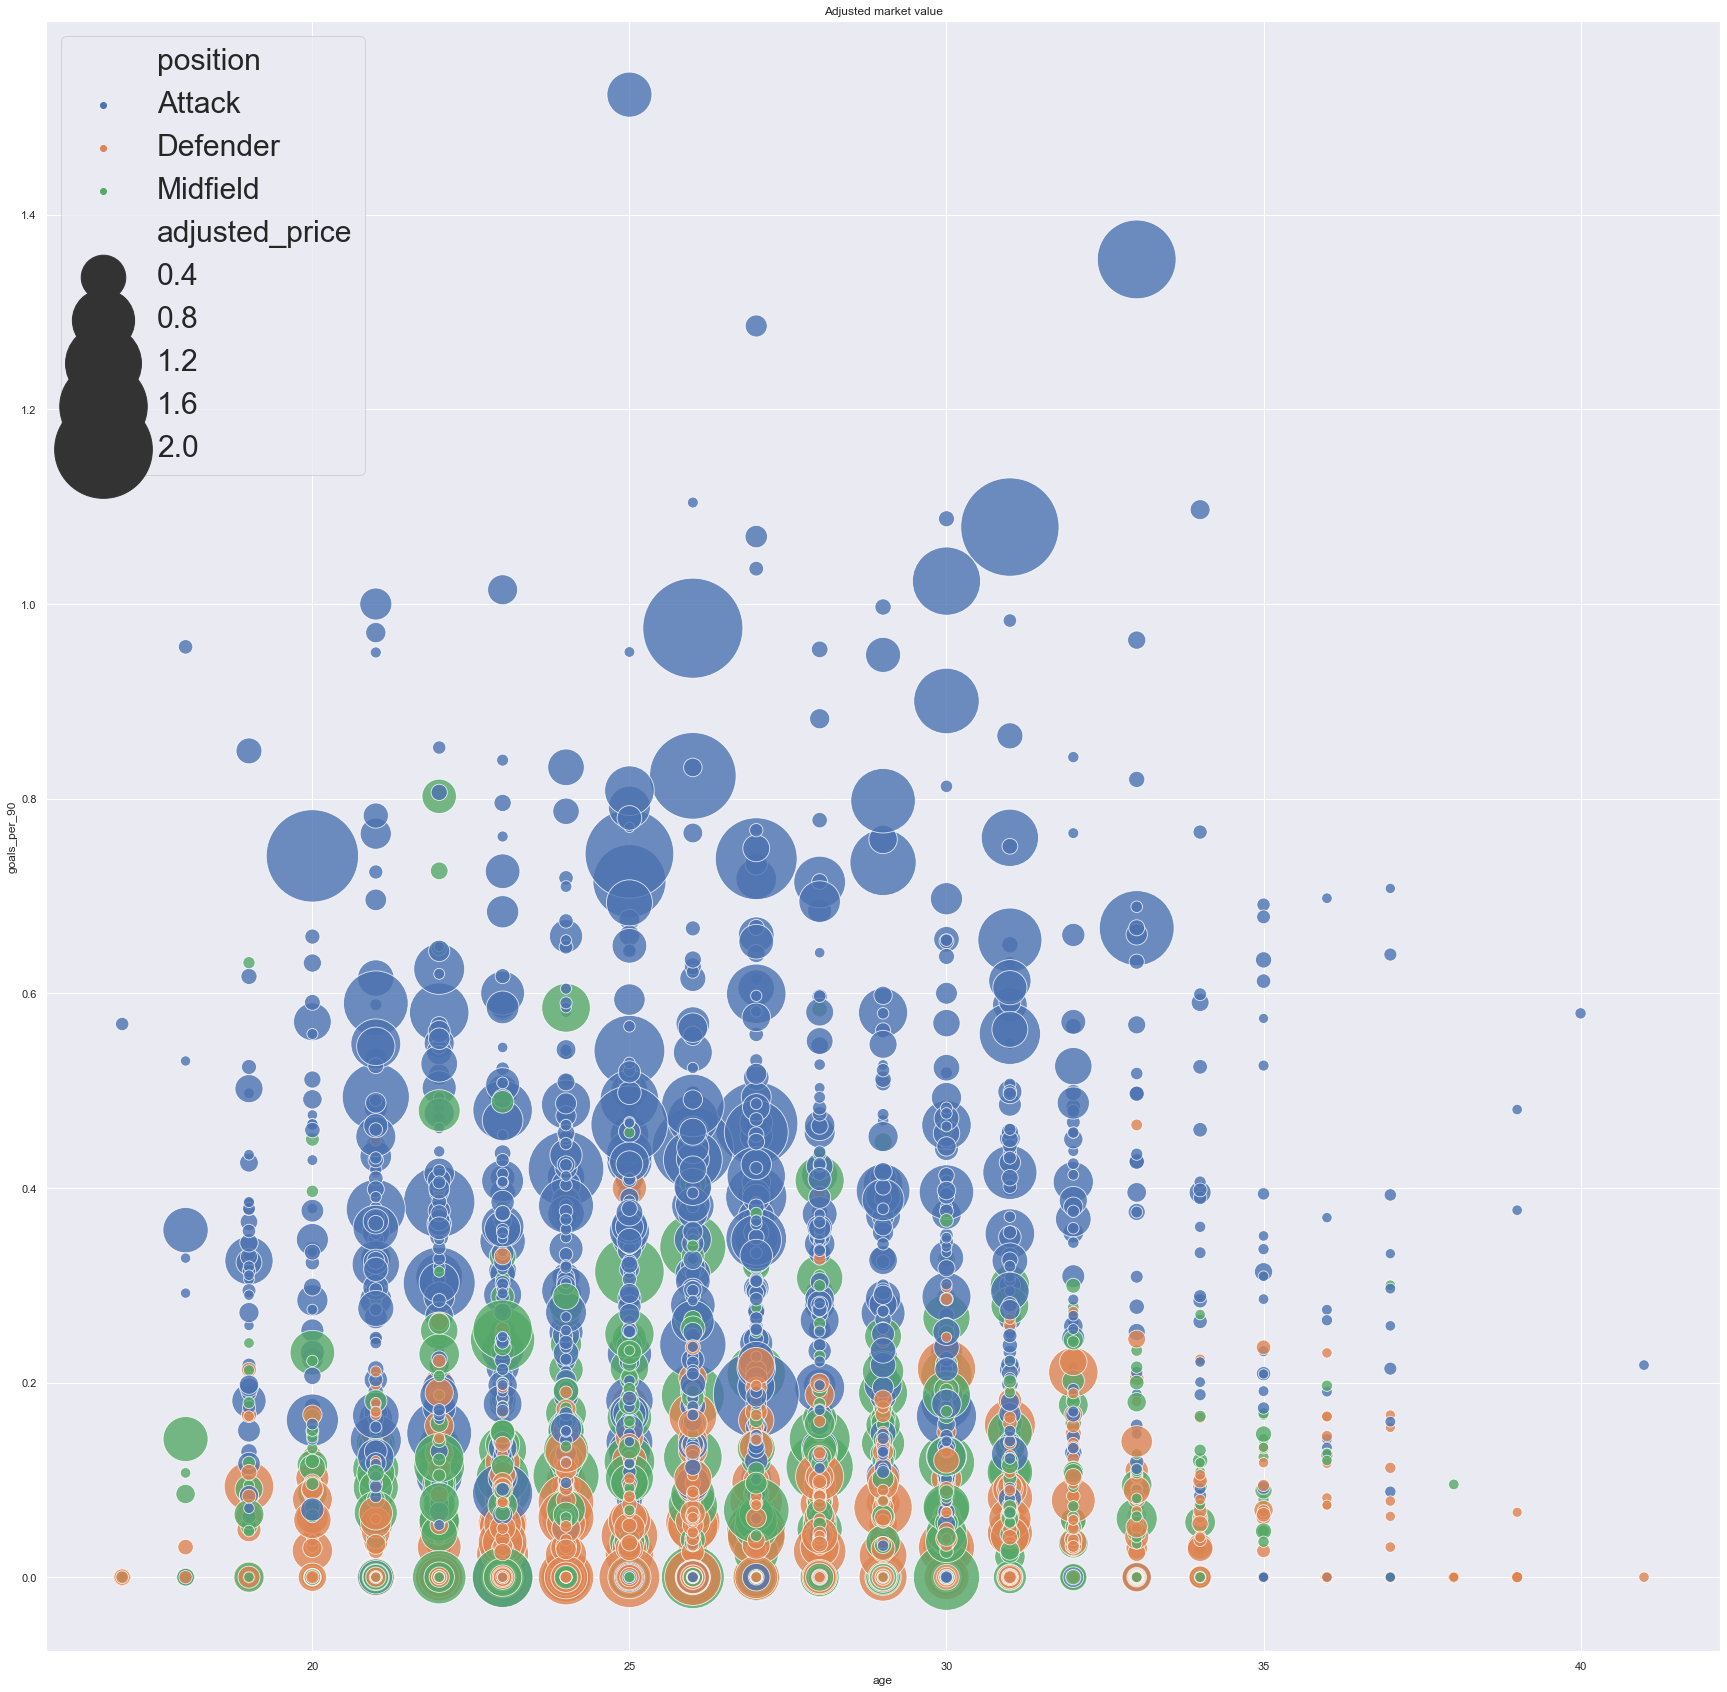

In [117]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.scatterplot(data=merged_2018, x="age", y="goals_per_90", alpha=0.8, size="adjusted_price",legend=True, hue = 'position', sizes=(100,10000))
plt.title("Adjusted market value")
plt.legend(fontsize = '30', loc = "upper left");

### Defining Classification/Prediction variables

In [118]:
merged.columns

Index(['player_id', 'player_club_id', 'year', 'goals', 'assists',
       'yellow_cards', 'red_cards', 'minutes_played', 'games_played',
       'league_rank', 'adjusted_price', 'CL_minutes_played', 'CL_games_played',
       'EL_minutes_played', 'EL_games_played', 'goals_per_90',
       'assists_per_90', 'yellows_per_90', 'reds_per_90', 'minutes_per_game',
       'country_of_citizenship', 'country_of_birth', 'position', 'foot',
       'height_in_cm', 'age'],
      dtype='object')

In [119]:
X_prediction = merged[['minutes_played',
       'games_played', 'league_rank', 'CL_minutes_played',
       'CL_games_played', 'EL_minutes_played', 'EL_games_played',
       'goals_per_90', 'assists_per_90', 'yellows_per_90', 'reds_per_90',
       'minutes_per_game', 'position', 'foot', 'height_in_cm', 'age']]
y_prediction = merged[['adjusted_price']]

In [120]:
X_prediction.sample(5)

,minutes_played,games_played,league_rank,CL_minutes_played,CL_games_played,EL_minutes_played,EL_games_played,goals_per_90,assists_per_90,yellows_per_90,reds_per_90,minutes_per_game,position,foot,height_in_cm,age
27403,2418,32,4.0,0,0,0,0,0.111663,0.334988,0.111663,0.0,75.562500,Midfield,Right,184.0,21
41530,554,9,4.0,0,0,0,0,0.000000,0.162455,0.487365,0.0,61.555556,Defender,Left,185.0,20
47250,525,10,3.0,0,0,0,0,0.000000,0.685714,0.342857,0.0,52.500000,Defender,Right,181.0,20
23826,704,11,8.0,0,0,0,0,0.383523,0.000000,0.255682,0.0,64.000000,Attack,Right,188.0,25
43903,1052,14,13.0,0,0,0,0,0.000000,0.256654,0.256654,0.0,75.142857,Midfield,Right,179.0,24


Our goal is to predict the players' market value based on their performance, the league they play in, participation in international competitions, position, footing, age and height, so we define those variables as our X's (predictors).

In [121]:
y_prediction.sample(5)

,adjusted_price
2430,3.636620e+05
48164,2.466667e+06
33885,2.946719e+05
34989,7.126889e+06
8457,5.205151e+06


In [122]:
X_class = merged[['minutes_played',
       'games_played', 'adjusted_price', 'CL_minutes_played',
       'CL_games_played', 'EL_minutes_played', 'EL_games_played',
       'goals_per_90', 'assists_per_90', 'yellows_per_90', 'reds_per_90',
       'minutes_per_game', 'height_in_cm', 'age']]
y_class = merged[['position']]                 

For classification, we want to use performance indicators like goals scored, assists, playing minutes, red/yellow cards, market value, age, and height.

### Encoding Categorical Data

In [123]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44742 entries, 0 to 48446
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   player_id               44742 non-null  int64   
 1   player_club_id          44742 non-null  int64   
 2   year                    44742 non-null  int64   
 3   goals                   44742 non-null  int64   
 4   assists                 44742 non-null  int64   
 5   yellow_cards            44742 non-null  int64   
 6   red_cards               44742 non-null  int64   
 7   minutes_played          44742 non-null  int64   
 8   games_played            44742 non-null  int64   
 9   league_rank             44742 non-null  float64 
 10  adjusted_price          44742 non-null  float64 
 11  CL_minutes_played       44742 non-null  int64   
 12  CL_games_played         44742 non-null  int32   
 13  EL_minutes_played       44742 non-null  int64   
 14  EL_games_played       

-- Columns foot and positions are categorical data that need to be encoded. We will be using one hot encoder.

In [124]:
merged.foot.value_counts()

Right    31546
Left     11299
Both      1897
Name: foot, dtype: int64

In [125]:
merged.position.value_counts()

Defender    17788
Attack      15640
Midfield    11314
Name: position, dtype: int64

In [127]:
#Function for encoding
def one_hot_encoder(df, column):
    # Perform one-hot encoding using pandas' get_dummies function
    one_hot_df = pd.get_dummies(df[column])

    # Add the one-hot encoded columns to the original DataFrame
    df_encoded = pd.concat([df, one_hot_df], axis=1)

    # Drop the original column that was encoded
    df_encoded.drop(column, axis=1, inplace=True)

    return df_encoded


In [128]:
#Make a new copy to contain encoded columns
merged2 = merged.copy()

In [129]:
#encoding poistion column
merged2 = one_hot_encoder(merged2,'position')

In [130]:
#encoding poistion column
merged2 = one_hot_encoder(merged2,'foot')

In [131]:
merged2.columns

Index(['player_id', 'player_club_id', 'year', 'goals', 'assists',
       'yellow_cards', 'red_cards', 'minutes_played', 'games_played',
       'league_rank', 'adjusted_price', 'CL_minutes_played', 'CL_games_played',
       'EL_minutes_played', 'EL_games_played', 'goals_per_90',
       'assists_per_90', 'yellows_per_90', 'reds_per_90', 'minutes_per_game',
       'country_of_citizenship', 'country_of_birth', 'height_in_cm', 'age',
       'Attack', 'Defender', 'Midfield', 'Both', 'Left', 'Right'],
      dtype='object')

### Preliminary Fitting and Testing Prediction Model

In [132]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split

#### Split data into test and train sub-dataframes

We will start by splitting the data 75-25.

In [133]:
#Separting the data into set of features X and target y
X = merged2.drop(['player_id', 'player_club_id', 'year', 'adjusted_price',  'country_of_citizenship', 'country_of_birth'], axis = 1)    
y = merged2['adjusted_price']


In [134]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_test

23979    4.070872e+05
45770    5.856741e+05
3956     1.621509e+07
40667    2.857927e+06
34894    3.086857e+05
             ...     
36405    9.164878e+05
27711    9.551403e+05
14218    3.801774e+05
46217    2.160055e+07
47508    6.262540e+06
Name: adjusted_price, Length: 11186, dtype: float64

##### Multi-variate OLS Regression for insights

In [135]:
#Use a multi-variate OLS regression model to check statistical significance of each feature.
multi_reg = smf.ols('adjusted_price ~ minutes_played + games_played + league_rank + CL_minutes_played + CL_games_played + EL_minutes_played + EL_games_played + goals_per_90 + assists_per_90 + yellows_per_90 + reds_per_90 + minutes_per_game + Attack + Defender + Midfield + Both + Left + Right + height_in_cm + age', merged2).fit()
multi_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         adjusted_price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2051.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        00:16:05   Log-Likelihood:            -7.8020e+05
No. Observations:               44742   AIC:                         1.560e+06
Df Residuals:                   44723   BIC:                         1.561e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.839e+06   8.63e+05      9.081      0.000    6.15e+06    9.53e+06
minutes_played     4963.3550    363.402     13.658      0.000    4251.080    5675.630
games_played      -2.878e+05   2.76e+04    -10.439      0.000   -3.42e+05   -2.34e+05
league_rank       -6.009e+05   8534.491    -70.404      0.000   -6.18e+05   -5.84e+05
CL_minutes_played  1.631e+04   1381.057     11.811      0.000    1.36e+04     1.9e+04
CL_games_played    2.096e+06   1.04e+05     20.189      0.000    1.89e+06     2.3e+06
EL_minutes_played -5195.8770   1346.018     -3.860      0.000   -7834.096   -2557.658
EL_games_played    1.052e+06   1.01e+05     10.440      0.000    8.55e+05    1.25e+06
goals_per_90       1.015e+07   3.21e+05     31.622      0.000    9.52e+06    1.08e+07
assists_per_90     7.345e+06   4.12e+05     17.842      0.000    6.54e+06    8.15e+06
yellows_per_90    -8.899e+05   2.89e+05     -3.080      0.002   -1.46e+06   -3.24e+05
reds_per_90           -1e+06      2e+06     -0.501      0.616   -4.91e+06    2.91e+06
minutes_per_game  -3100.7327   7438.923     -0.417      0.677   -1.77e+04    1.15e+04
Attack             2.781e+06   2.87e+05      9.681      0.000    2.22e+06    3.34e+06
Defender           1.942e+06   3.14e+05      6.184      0.000    1.33e+06    2.56e+06
Midfield           3.116e+06   2.91e+05     10.691      0.000    2.54e+06    3.69e+06
Both               2.783e+06   3.28e+05      8.488      0.000    2.14e+06    3.43e+06
Left                2.62e+06   2.96e+05      8.866      0.000    2.04e+06     3.2e+06
Right              2.437e+06   2.99e+05      8.140      0.000    1.85e+06    3.02e+06
height_in_cm      -2488.6687   7191.812     -0.346      0.729   -1.66e+04    1.16e+04
age               -2.628e+05   1.07e+04    -24.600      0.000   -2.84e+05   -2.42e+05
==============================================================================
Omnibus:                    42508.290   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4094622.971
Skew:                           4.348   Prob(JB):                         0.00
Kurtosis:                      49.052   Cond. No.                     2.80e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

-- The regression model has an R-squared value of 0.452, indicating that 45.2% of the variability in the dependent variable (adjusted_price) is explained by the independent variables included in the model. The F-statistic of 2051 and the associated p-value of 0.00 indicate that the model as a whole is statistically significant, meaning that at least one of the independent variables is significantly related to the dependent variable.

Looking at the coefficients, we can see that some independent variables have statistically significant relationships with the dependent variable (adjusted_price), while others do not. For example, minutes_played, games_played, league_rank, CL_minutes_played, CL_games_played, EL_minutes_played, EL_games_played, goals_per_90, assists_per_90, yellows_per_90, Attack, Defender, Midfield, Both, Left, Right, and age have statistically significant relationships with adjusted_price as their p-values are less than 0.05.

On the other hand, the coefficient for reds_per_90 has a p-value of 0.616, indicating that it is not statistically significant and should be removed from the model. The same can be said about the coefficient for height_in_cm, which has a p-value of 0.729.

##### Linear Multivariate Regression

In [136]:
#Initialise and fit linear regression model for 6 features
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [137]:
#Print the train and test MSE values for the model
print('Training MSE: ', mean_squared_error(y_train, lm.predict(X_train)))
print('Testing MSE: ',  mean_squared_error(y_test, lm.predict(X_test)))

#Print the train and test R-squared values for the model
print("Training R-squared: ", lm.score(X_train, y_train))
print("Testing R-squared: ", lm.score(X_test, y_test))

Training MSE:  75350608066208.69
Testing MSE:  86434614468116.42
Training R-squared:  0.4891801228190772
Testing R-squared:  0.44678191580374216


-- The training and testing MSE values are quite high, suggesting that the model is not fitting the data very well. The R-squared values are also relatively low, indicating that the model explains only a small amount of the variance in the data. Overall, the model could be improved to better fit the data.

Further feature engineering and model selection should yeild better results.

#### References:
1. All labs
2. Lecture notes and in-class exercises
3. HW 1 and 2, midterm
4. https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
5. EDA Lecture notes and cheat sheet
6. https://www.uefa.com/nationalassociations/uefarankings/country/#/yr/2021 (UEFA rankings)
7. https://seaborn.pydata.org/generated/seaborn.scatterplot.html